# GBoosting

### Importing Library

In [257]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # modele d'exemple a modifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

### Importing the Data

In [258]:
# Import data
data = pd.read_csv('data/train_diabetes_health_indicators.csv')
data['Diabetes_012'] = data['Diabetes_012'].astype(int)

X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

## Exploring the Data

In [259]:
data.head()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,111866,2,1,1.0,1,32.0,1.0,0.0,1.0,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,206199,0,0,1.0,1,28.0,0.0,0.0,0.0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,144211,0,0,1.0,1,24.0,1.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,89872,2,1,1.0,1,38.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,34953,0,0,1.0,1,30.0,0.0,0.0,0.0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [260]:
data.shape

(47276, 23)

In [261]:
data.describe()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,118671.500613,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,68125.928125,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,59910.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,118660.500000,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,177744.250000,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,236377.000000,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [262]:
data.duplicated().sum()

0

In [263]:
data= data.drop("Unnamed: 0",axis=1)

In [264]:
# number of unique values in each column
data.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     74
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                30
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                  11
dtype: int64

In [265]:
data.dtypes

Diabetes_012              int64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object

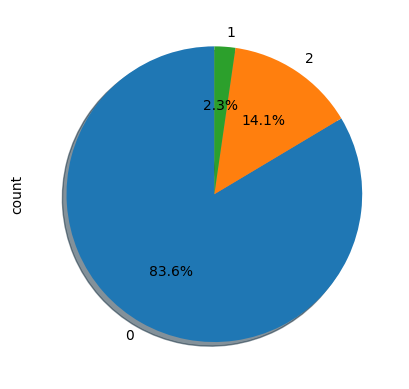

In [266]:
y.value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90);


# Feature enginering

In [267]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

X[numerical_columns] = scaler.fit_transform(X)


X.describe()

,Unnamed: 0,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
count,47276.000000,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,...,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04,4.727600e+04
mean,118671.500613,-5.470800e-17,-5.711275e-18,1.762229e-16,1.817839e-16,-3.757418e-18,-1.052077e-17,6.192225e-17,-1.038550e-16,6.793411e-17,...,6.868560e-17,-6.011868e-19,-1.104681e-17,-9.919583e-18,9.168099e-18,-1.301570e-16,1.522506e-16,-4.301492e-16,-2.374688e-17,-9.123010e-17
std,68125.928125,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,4.000000,-8.497842e-01,-8.198686e-01,-5.200032e+00,-2.581157e+00,-8.303702e-01,-1.994670e-01,-3.062594e-01,-1.890012e+00,-1.276810e+00,...,-2.586297e-01,-1.434811e+00,-4.997854e-01,-4.564839e-01,-4.245558e-01,-9.549845e-01,-2.133973e+00,-4.379246e+00,-2.495291e+00,-1.741903e+00
25%,59910.750000,-8.497842e-01,-8.198686e-01,1.923065e-01,-7.526113e-01,-8.303702e-01,-1.994670e-01,-3.062594e-01,5.290970e-01,-1.276810e+00,...,-2.586297e-01,-4.611069e-01,-4.997854e-01,-4.564839e-01,-4.245558e-01,-9.549845e-01,-8.947013e-01,-1.207781e+00,-8.124647e-01,-8.625405e-01
50%,118660.500000,-8.497842e-01,-8.198686e-01,1.923065e-01,-1.430961e-01,-8.303702e-01,-1.994670e-01,-3.062594e-01,5.290970e-01,7.832019e-01,...,-2.586297e-01,-4.611069e-01,-4.997854e-01,-4.564839e-01,-4.245558e-01,-9.549845e-01,3.475262e-02,-1.506260e-01,2.894827e-02,-1.614764e-04
75%,177744.250000,1.176769e+00,1.219708e+00,1.923065e-01,4.664192e-01,1.204282e+00,-1.994670e-01,-3.062594e-01,5.290970e-01,7.832019e-01,...,-2.586297e-01,5.125973e-01,8.999737e-03,-2.137460e-01,-4.245558e-01,1.047137e+00,6.543885e-01,9.065290e-01,8.703613e-01,8.671203e-01
max,236377.000000,1.176769e+00,1.219708e+00,1.923065e-01,1.006628e+01,1.204282e+00,5.013360e+00,3.265206e+00,5.290970e-01,7.832019e-01,...,3.866532e+00,2.460006e+00,3.316103e+00,3.184584e+00,2.355403e+00,1.047137e+00,1.583842e+00,9.065290e-01,1.711774e+00,1.727782e+00


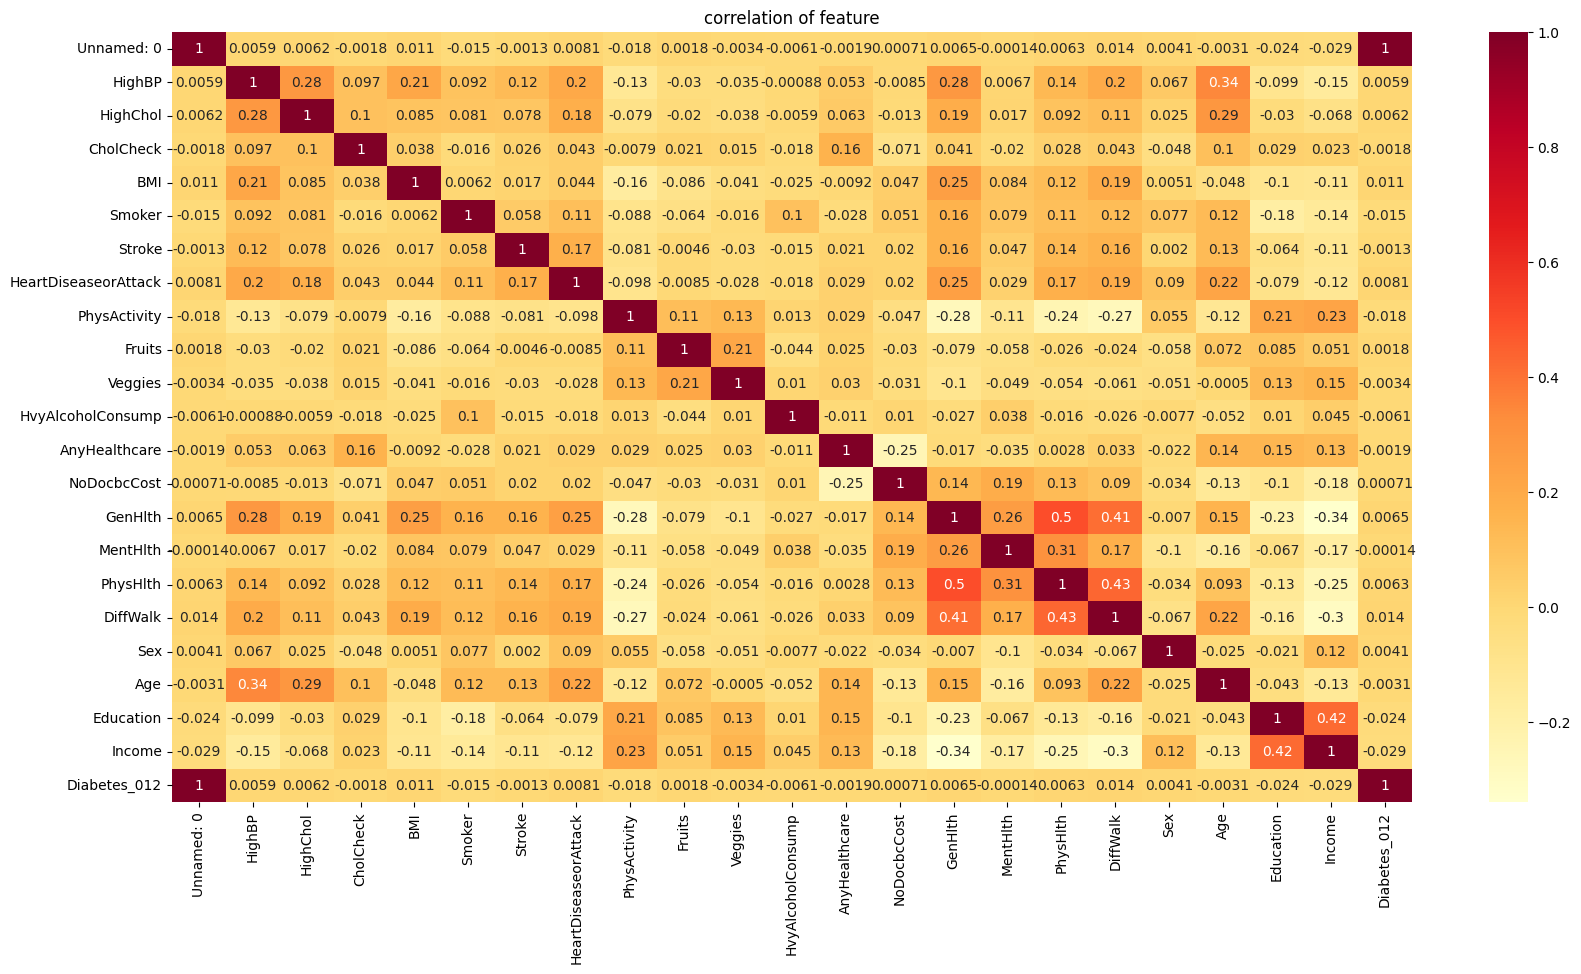

In [268]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

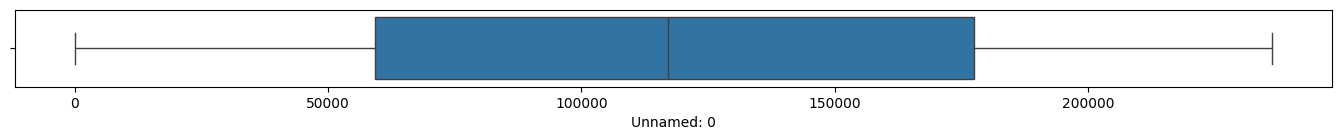

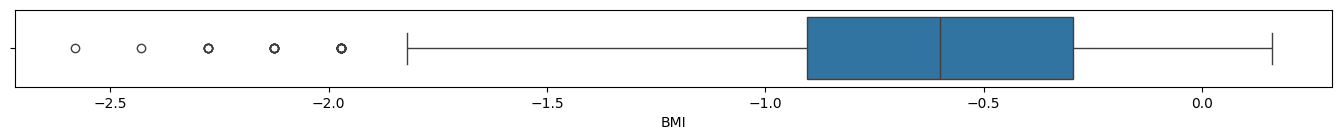

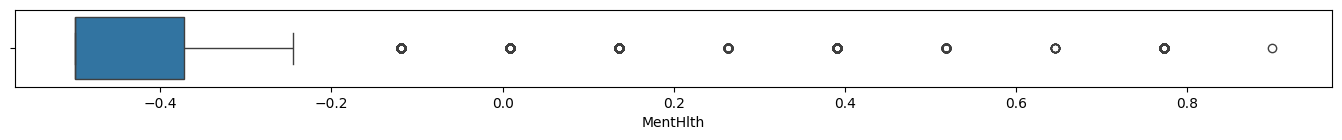

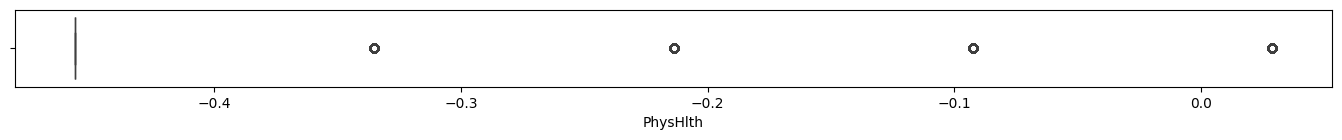

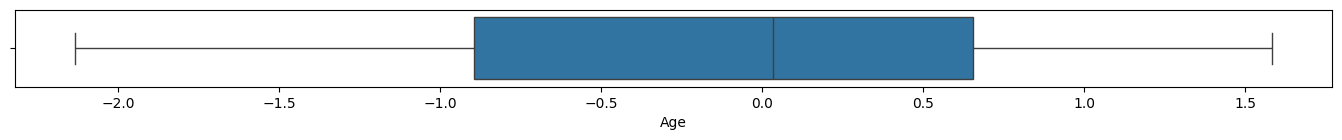

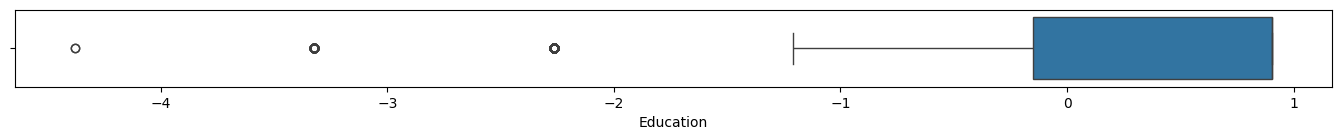

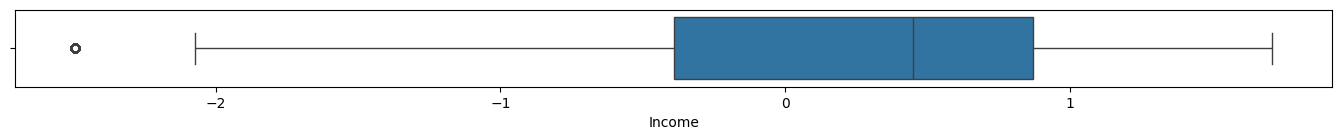

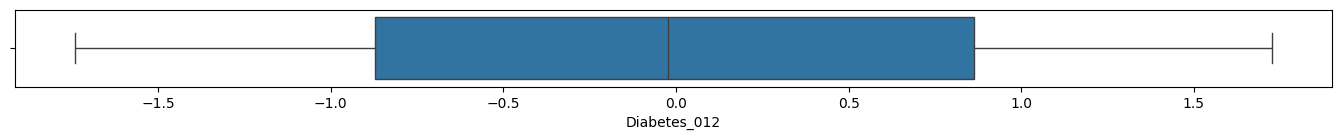

In [281]:
import matplotlib.pyplot as plt

for column in X:
        
        if(X[column].nunique()>3):
                plt.figure(figsize=(17,1))
                sns.boxplot(data=X, x=column)

In [270]:
y=y[X["BMI"]<0.25]
y=y[X["GenHlth"]< 0.35]
y=y[X["MentHlth"]< 0.9]
y=y[X["PhysHlth"]< 0.1]
X=X[X["BMI"]<0.25]
X=X[X["GenHlth"]< 0.35]
X=X[X["MentHlth"]< 0.9]
X=X[X["PhysHlth"]< 0.1]

print(X.shape)
# Split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y)
y_train.head()

(17160, 23)


18691    0
5059     0
43727    0
41017    0
24853    0
Name: Diabetes_012, dtype: int64

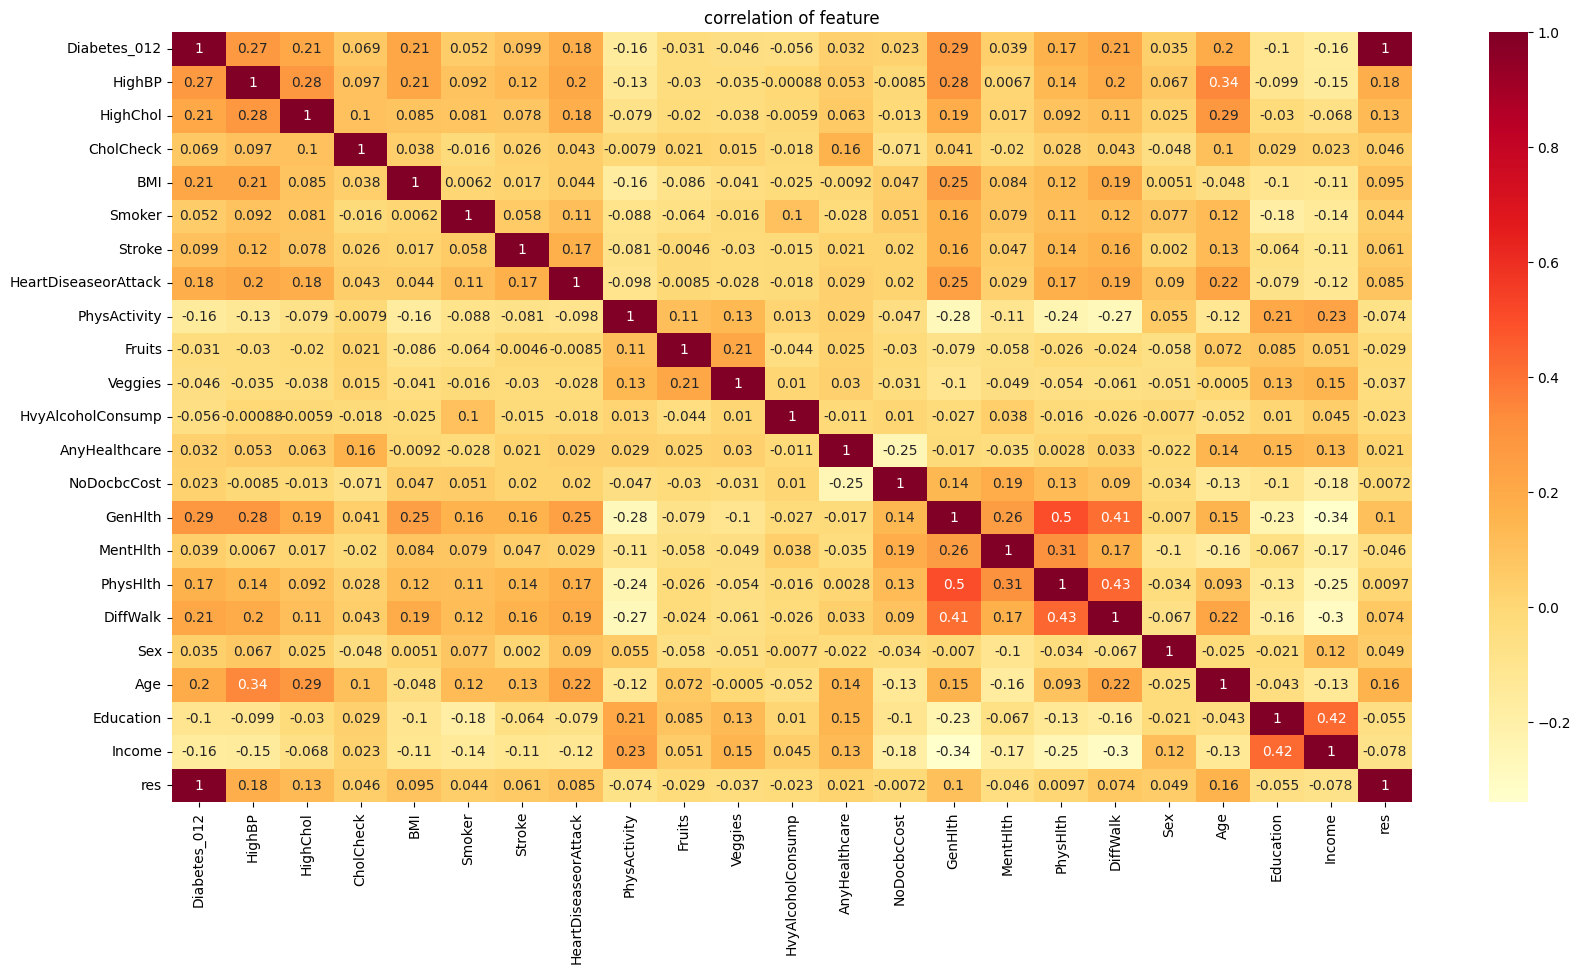

In [271]:
#data=data[[ 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth',  'PhysActivity']]
data["res"]=y
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()
data=data.drop("res",axis=1)

## Over Sampling

In [272]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_over_sampled, y_over_sampled = smote.fit_resample(X_train, y_train)

18691    0
5059     0
43727    0
41017    0
24853    0
Name: Diabetes_012, dtype: int64


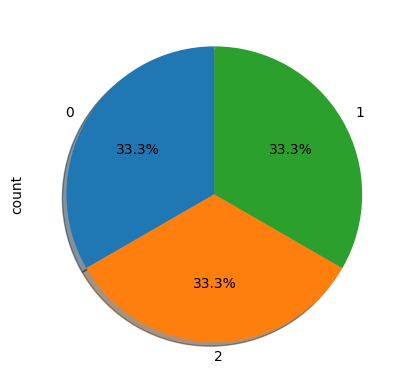

In [273]:
y_over_sampled.value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90);


In [274]:
# Initialize the model
#---- à modifier en utilisant l'un des trois modeles : SVM, RandomForest et GradientBoosting ----
from  sklearn.ensemble import GradientBoostingClassifier
# Example with Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=20)


# Train the model
clf.fit(X_over_sampled, y_over_sampled)
X_over_sampled.shape

(36255, 23)

In [275]:
# Predict on test data
pred_over = clf.predict(X_test)

## UNDER sampling

In [276]:

import imblearn
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_under_sampled, y_under_sampled = undersampler.fit_resample(X_train, y_train)

In [277]:

from  sklearn.ensemble import RandomForestClassifier
# Example with Gradient Boosting Classifier
clf = RandomForestClassifier()


# Train the model
clf.fit(X_under_sampled, y_under_sampled)

pred_under = clf.predict(X_test)

In [278]:
# Evaluate model predictions
print(f'Classification_report:\n {classification_report(y_test,pred_under)}')
print(f'Classification_report:\n {classification_report(y_test,pred_over)}')

Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.58      0.73      4030
           1       0.02      0.33      0.03        54
           2       0.09      0.38      0.15       206

    accuracy                           0.57      4290
   macro avg       0.36      0.43      0.30      4290
weighted avg       0.92      0.57      0.69      4290

Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      4030
           1       0.00      0.00      0.00        54
           2       0.15      0.29      0.20       206

    accuracy                           0.87      4290
   macro avg       0.37      0.40      0.38      4290
weighted avg       0.90      0.87      0.89      4290



# Combining under aand over sampling

In [279]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a pipeline with both under-sampling and over-sampling
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('over', SMOTE(random_state=42)),
    ('model', GradientBoostingClassifier(n_estimators=10, learning_rate=0.4, max_depth=3, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f'Classification_report:\n {classification_report(y_test,y_pred)}')


Accuracy: 0.5484848484848485
Classification_report:
               precision    recall  f1-score   support

           0       0.97      0.56      0.71      4030
           1       0.02      0.43      0.04        54
           2       0.10      0.45      0.16       206

    accuracy                           0.55      4290
   macro avg       0.37      0.48      0.30      4290
weighted avg       0.92      0.55      0.67      4290



In [280]:
# Export model
pickle.dump(clf, open("classification_model.pkl", "wb"))